# Sensitivity Analysis

This notebook contains code used to perform sensitivity analysis.

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
from IPython.display import display, HTML
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from tti_explorer import config, utils
from tti_explorer.case import simulate_case, CaseFactors
from tti_explorer.contacts import EmpiricalContactsSimulator
from tti_explorer.strategies import TTIFlowModel, RETURN_KEYS

import warnings
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')

In [2]:
%run utilities.ipynb

## Experimentations

### Policy and Strategy

This section experiments the effect of varying the stringency level of NPIs and various TTI strategies. We aim to observe the effect of altering NPIs and TTI strategies to the reproduction number, number of manual traces, number of app traces, number of tests needed, and number of person-days in quarantine.

In [20]:
df_policy = pd.read_csv("../results/policy-strategy.csv").iloc[:, 1:]

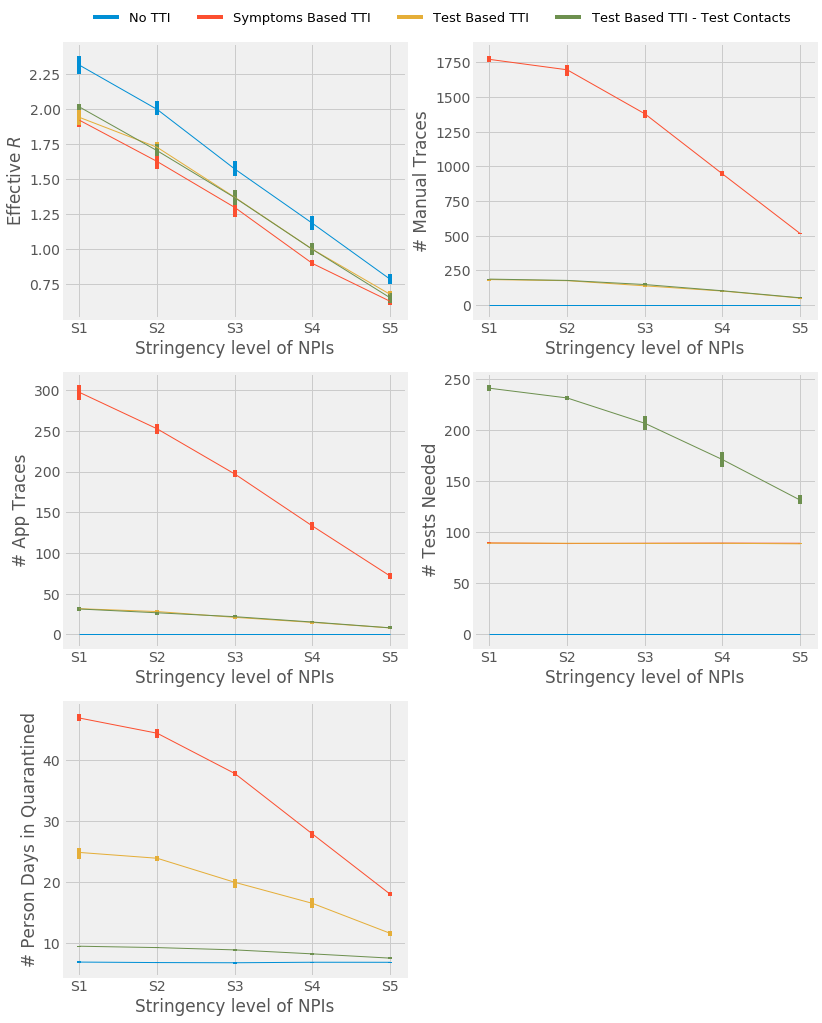

In [35]:
# Plot
fig = plt.figure(figsize=(12, 16), facecolor="white")
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)

# Line plot
sns.lineplot(x="strategy", y="effective_r", data=df_policy, 
             hue="gov_policy", err_style="bars", linewidth=1,
             ci=95, ax=ax1, markers=True)
sns.lineplot(x="strategy", y="manual_traces", data=df_policy, 
             hue="gov_policy", err_style="bars", linewidth=1,
             ci=95, ax=ax2, markers=True)
sns.lineplot(x="strategy", y="app_traces", data=df_policy, 
             hue="gov_policy", err_style="bars", linewidth=1,
             ci=95, ax=ax3, markers=True)
sns.lineplot(x="strategy", y="test_needed", data=df_policy, 
             hue="gov_policy", err_style="bars", linewidth=1,
             ci=95, ax=ax4, markers=True)
sns.lineplot(x="strategy", y="persondays_quarantined", data=df_policy, 
             hue="gov_policy", err_style="bars", linewidth=1,
             ci=95, ax=ax5, markers=True)

# Display one legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[1:], labels=["No TTI", "Symptoms Based TTI", "Test Based TTI", "Test Based TTI - Test Contacts"], loc='center left', 
           bbox_to_anchor=(0.05, 1.09), ncol=4, frameon=False,
          prop={'size': 13})

# Remove legends
for ax in [ax2, ax3, ax4, ax5]:
    legend = ax.legend()
    legend.remove()

# Rename axis
ax1.set_xlabel("Stringency level of NPIs")
ax1.set_ylabel("Effective $R$")


ax2.set_xlabel("Stringency level of NPIs")
ax2.set_ylabel("# Manual Traces")


ax3.set_xlabel("Stringency level of NPIs")
ax3.set_ylabel("# App Traces")


ax4.set_xlabel("Stringency level of NPIs")
ax4.set_ylabel("# Tests Needed")


ax5.set_xlabel("Stringency level of NPIs")
ax5.set_ylabel("# Person Days in Quarantined")

plt.show()

### Age

This section experiments the effect of varying the probability of case being under 18. We aim to see whether under 18 primary case infections is more fatal compared to over 18 primary case infections.

In [30]:
df_age = pd.read_csv("../results/age.csv").iloc[:, 1:]

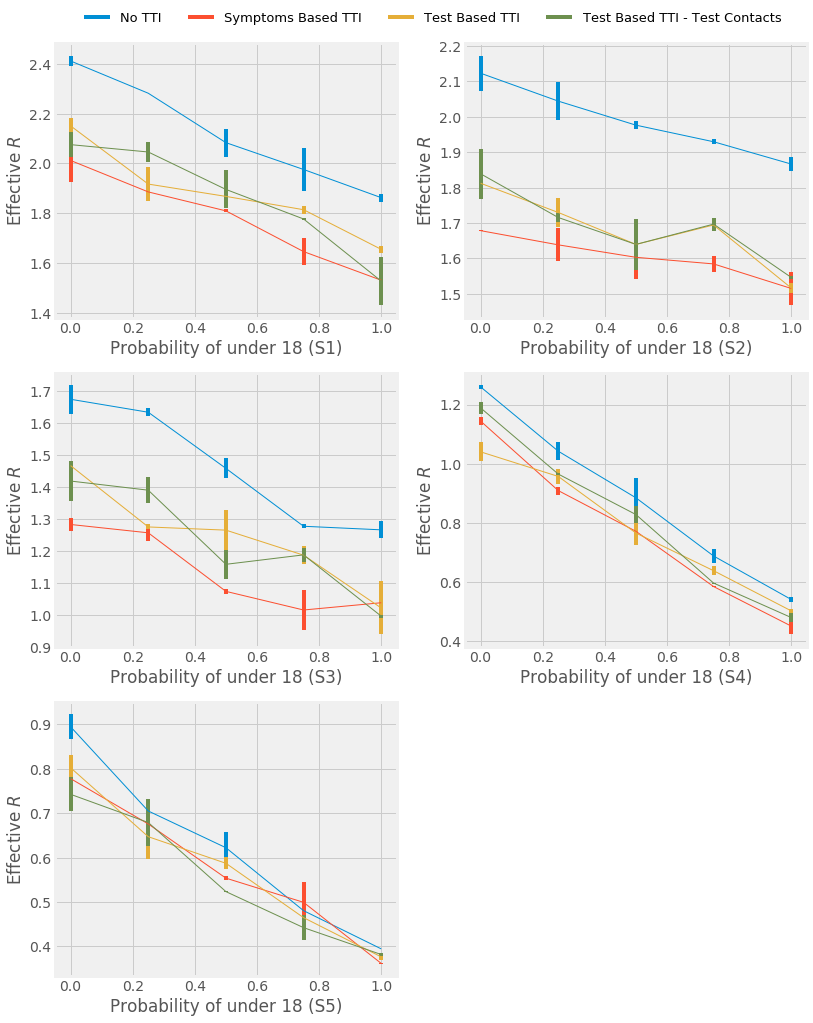

In [38]:
plot_axis_variation("age_prob", "effective_r", df_age, 95, "Probability of under 18", "Effective $R$")

### Compliance

This section experiments the effect of varying the compliance level to R. We aim to observe how significant compliance affect R.

In [32]:
df_compliance = pd.read_csv("../results/compliance.csv").iloc[:, 1:]

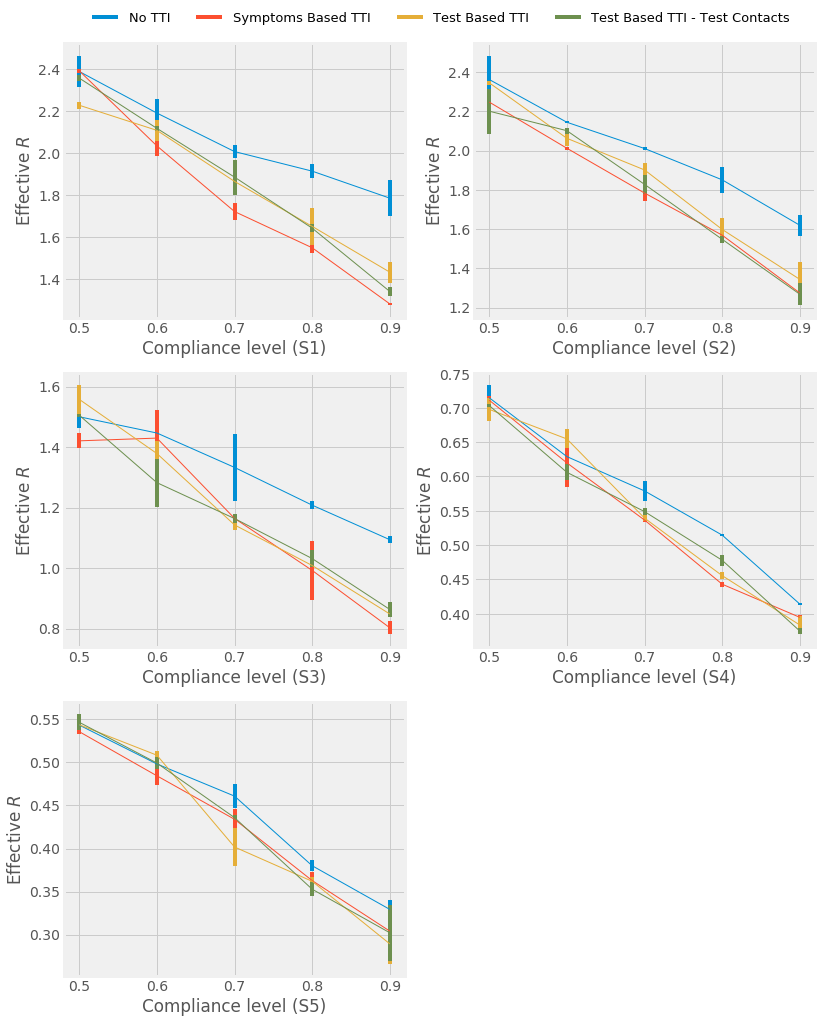

In [39]:
plot_axis_variation("compliance", "effective_r", df_compliance, 95, "Compliance level", "Effective $R$")

### Application Uptake

This section experiments the effect of varying application uptake to R. We aim to observe how significant app usage affects R.

In [41]:
df_app = pd.read_csv("../results/app-uptake.csv").iloc[:, 1:]

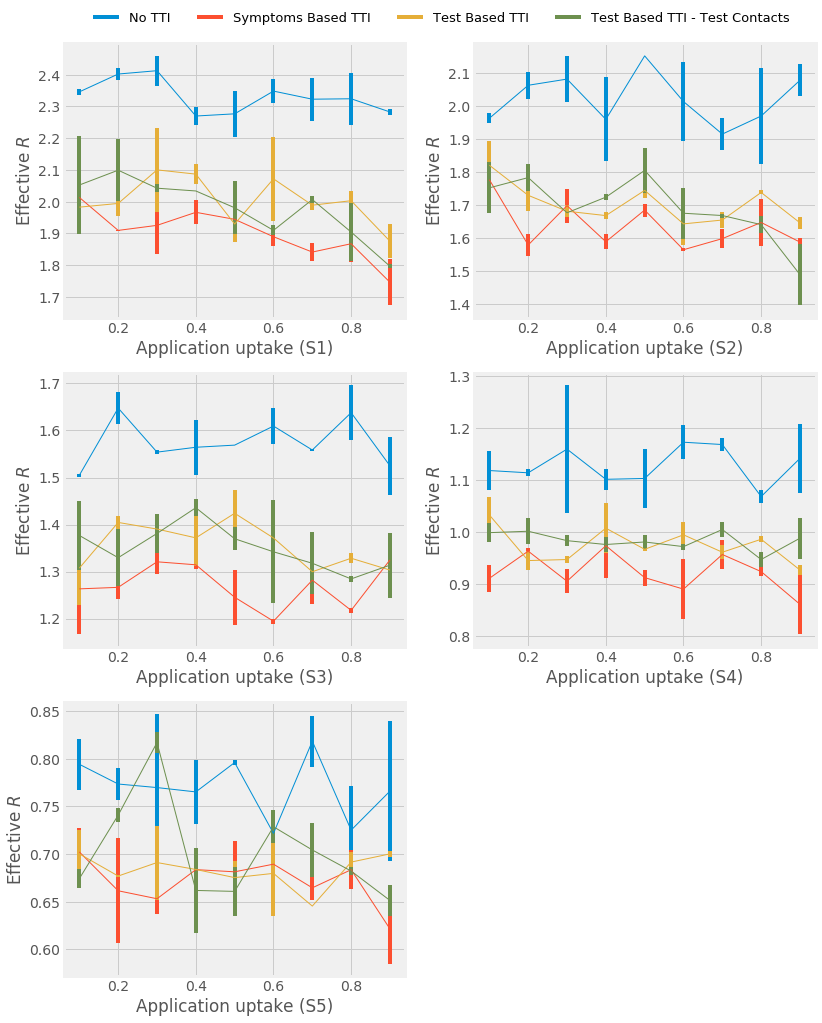

In [43]:
plot_axis_variation("app", "effective_r", df_app, 95, "Application uptake", "Effective $R$")

### Do Manual Tracing

This section experiments whether manual tracing affects R.

In [53]:
df_mt = pd.read_csv("../results/do-manual-tracing.csv").iloc[:, 1:]

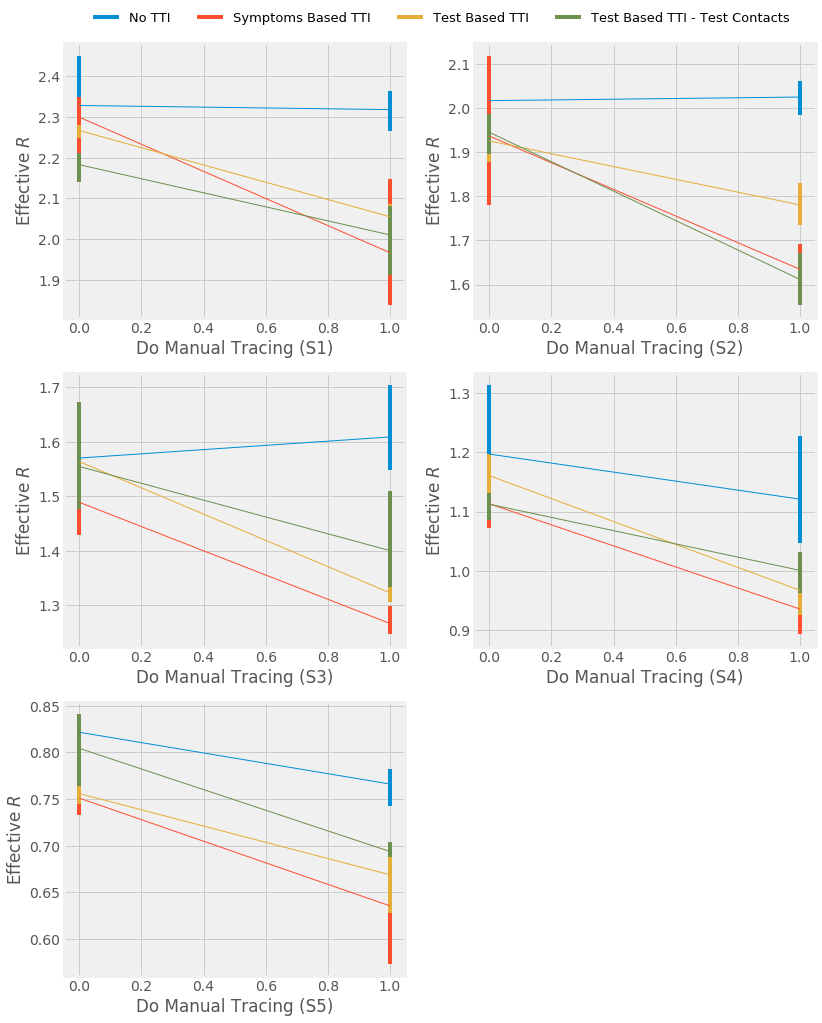

In [59]:
plot_axis_variation("mt", "effective_r", df_mt, 95, "Do Manual Tracing", "Effective $R$")

### Do App Tracing

This section experiments whether app tracing affects R.

In [61]:
df_at = pd.read_csv("../results/do-app-tracing.csv").iloc[:, 1:]

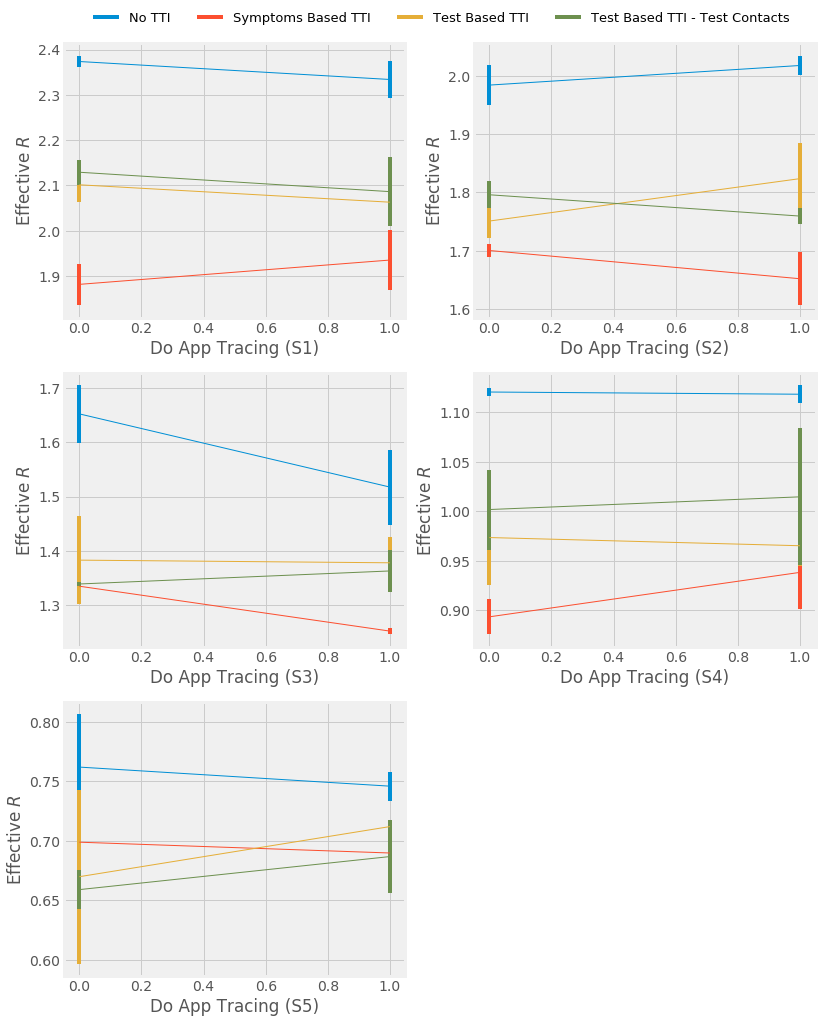

In [62]:
plot_axis_variation("at", "effective_r", df_at, 95, "Do App Tracing", "Effective $R$")

### Day of Symptoms Reporting

This section experiments the effect of varying the days of symptoms reporting (day=1: immediately report, day=2: takes two days to report after experiencing symptoms, etc).

In [63]:
df_symptoms_reporting = pd.read_csv("../results/day-symptoms-reporting.csv").iloc[:, 1:]

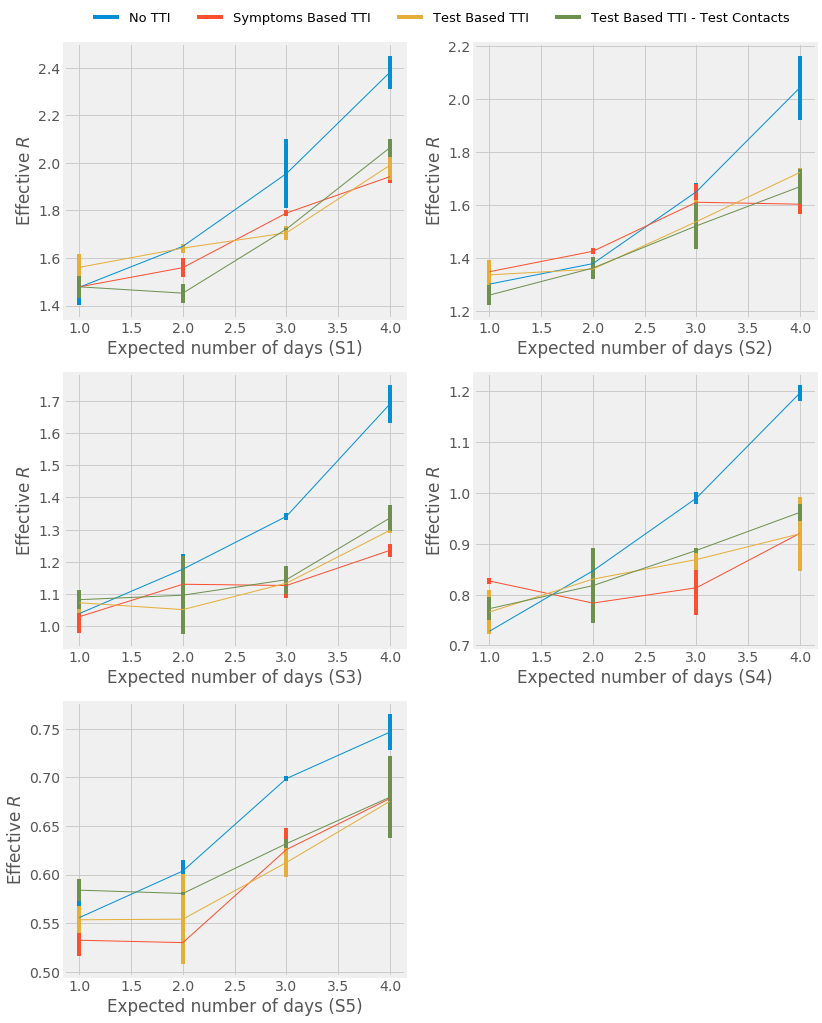

In [64]:
plot_axis_variation("day_symptoms_reporting", "effective_r", df_symptoms_reporting, 95, "Expected number of days", "Effective $R$")

### Latent Period

This section experiments the effect of latent period to effective R.

In [67]:
df_latent = pd.read_csv("../results/latent.csv").iloc[:, 1:]

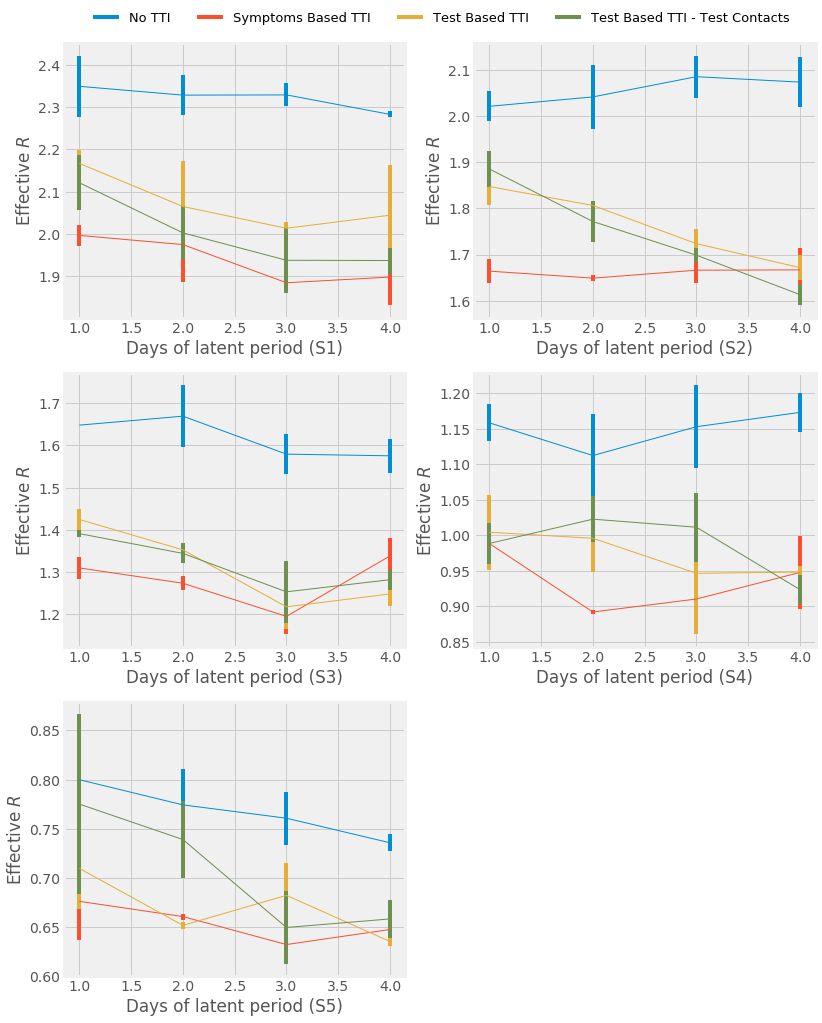

In [68]:
plot_axis_variation("latent", "effective_r", df_latent, 95, "Days of latent period", "Effective $R$")

### Most Infectious Day

This section experiments the effect of varying the most infectious period for COVID cases on R.

In [69]:
df_most_infectious = pd.read_csv("../results/most-infectious.csv").iloc[:, 1:]

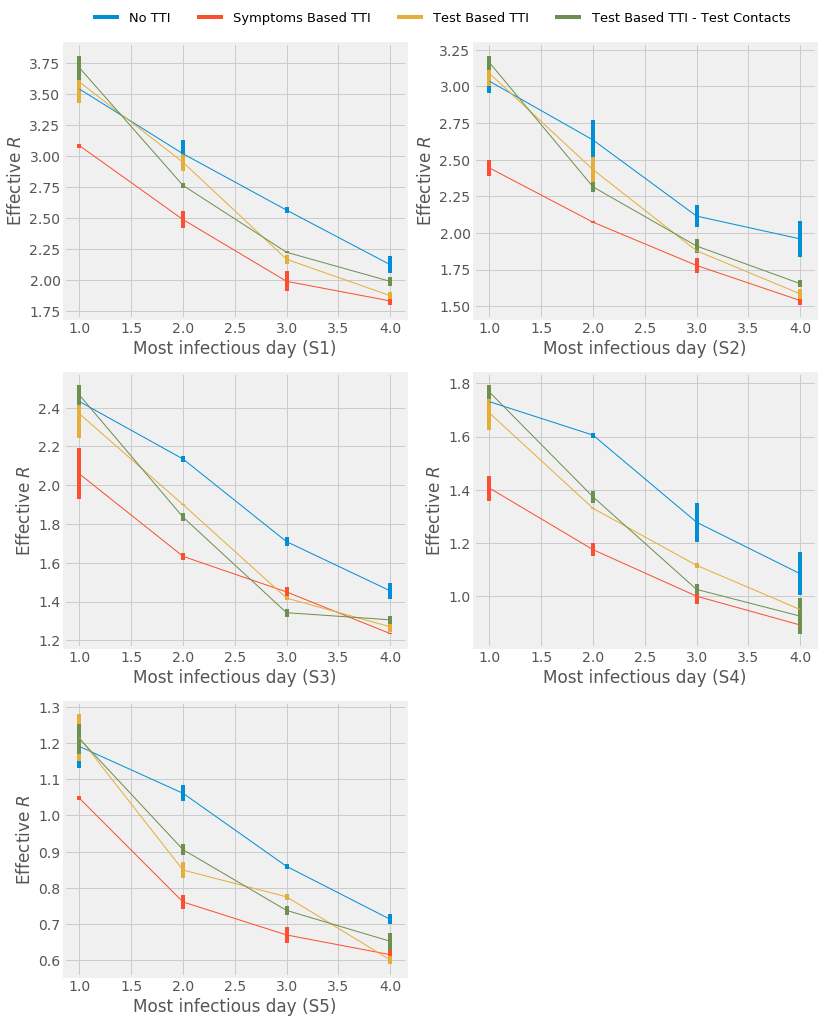

In [70]:
plot_axis_variation("most_infectious_day", "effective_r", df_most_infectious, 95, "Most infectious day", "Effective $R$")

### Work from Home

This section experiments whether increasing work from home helps reduce COVID spread.

In [71]:
df_wfh = pd.read_csv("../results/wfh.csv").iloc[:, 1:]

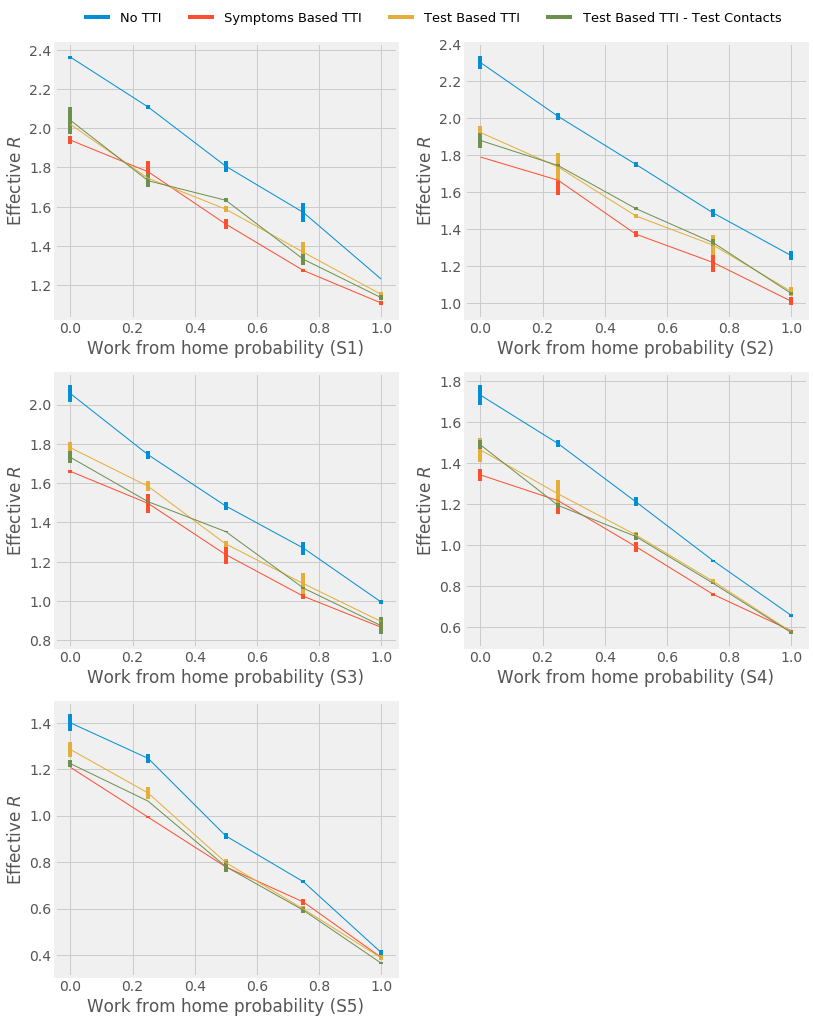

In [72]:
plot_axis_variation("wfh", "effective_r", df_wfh, 95, "Work from home probability", "Effective $R$")

### Go to School
This section experiments whether increasing go to school helps reduce COVID spread.

In [73]:
df_gts = pd.read_csv("../results/go-to-school.csv").iloc[:, 1:]

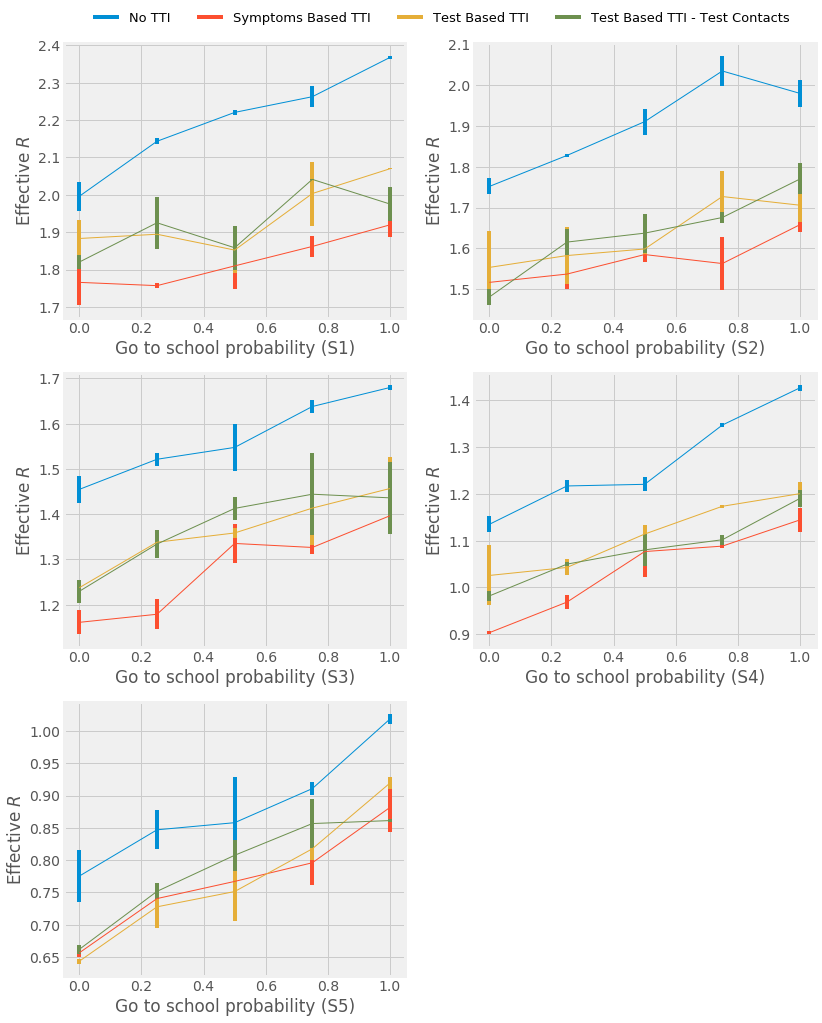

In [74]:
plot_axis_variation("gts", "effective_r", df_gts, 95, "Go to school probability", "Effective $R$")

### Test/Trace Delay
This section experiments the effect of test and manual tracing delay on COVID spread (reproduction rate).

In [3]:
df_test_trace = pd.read_csv("../results/test-trace.csv").iloc[:, 1:]

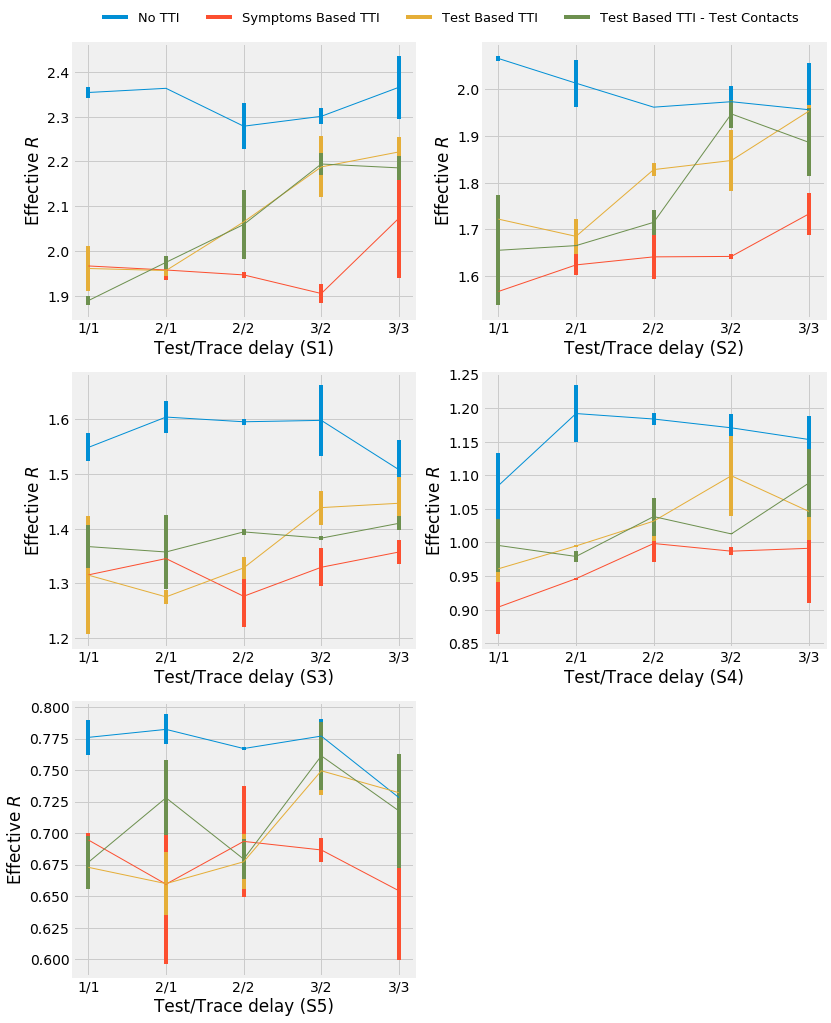

In [4]:
plot_axis_variation("test/trace", "effective_r", df_test_trace, 95, "Test/Trace delay", "Effective $R$")

### COVID Positive Cases
This section experiments the number of tests needed for respective number of COVID positive cases.

In [5]:
df_pos = pd.read_csv("../results/positive-covid.csv").iloc[:, 1:]

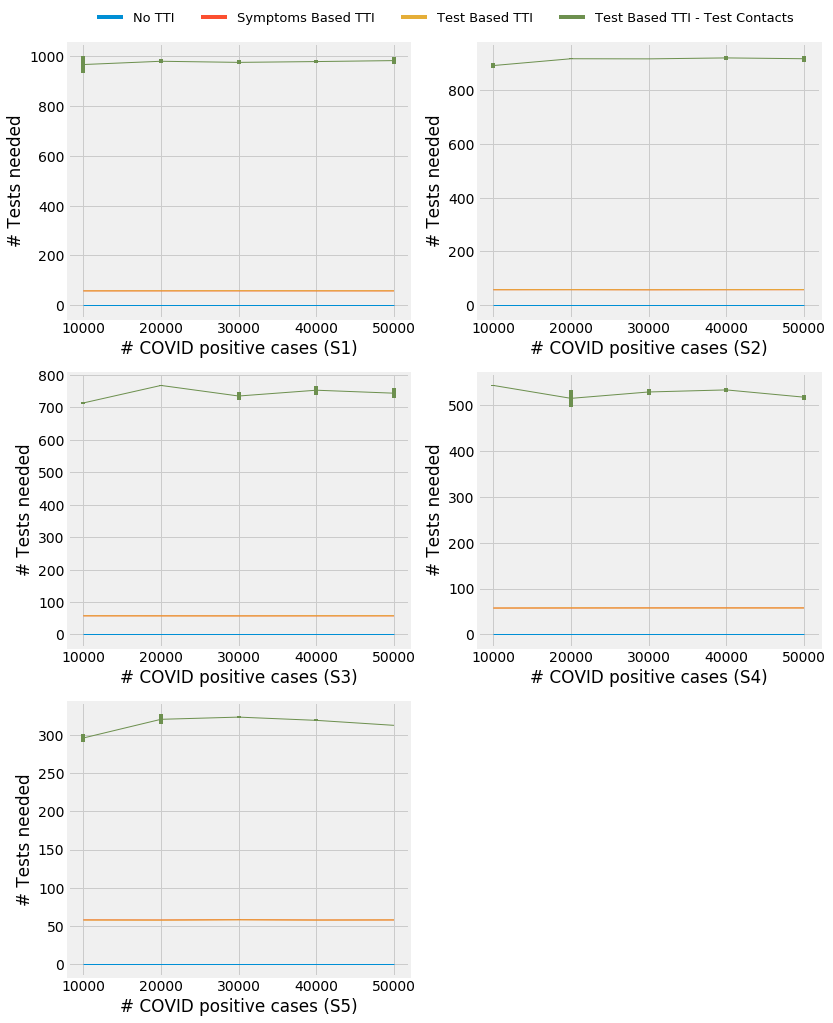

In [6]:
plot_axis_variation("n_cases", "test_needed", df_pos, 95, "# COVID positive cases", "# Tests needed")

### COVID Negative Cases
This section experiments the number of tests needed for respective number of symptomatic COVID negative cases.

In [67]:
df_neg = pd.read_csv("../results/negative-covid.csv").iloc[:, 1:]

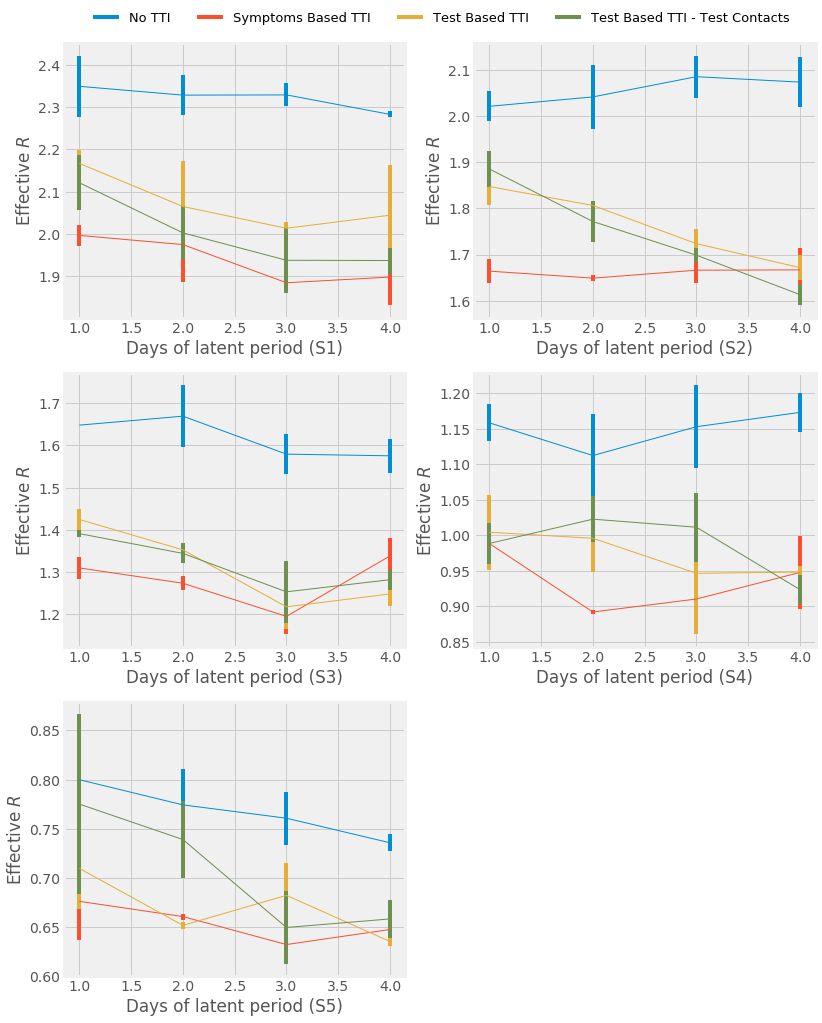

In [68]:
plot_axis_variation("n_cases", "test_needed", df_neg, 95, "# COVID negative cases", "# Tests needed")